In [13]:
# !pip install arch
!pip install keras tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 33.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 31.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.0
    Uninstalling ml_dtypes-0.5.0:
      Successfully uninstalled ml_dtypes-0

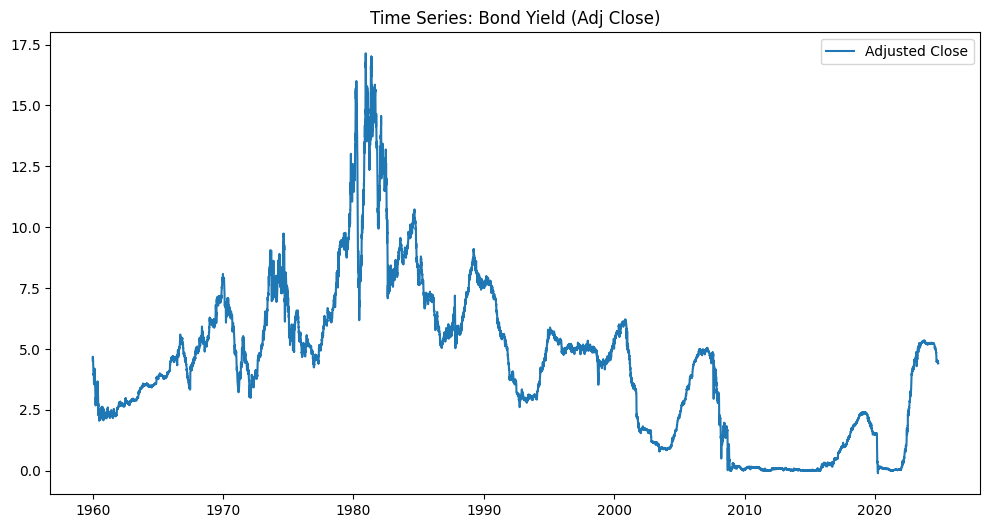

In [3]:
# Chuẩn bị dữ liệu

# Trước tiên, đảm bảo bạn đã tải và làm sạch dữ liệu.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Load data
data = pd.read_csv("data/data.csv", parse_dates=["Date"], index_col="Date")
data = data.asfreq('B')  # Business day frequency
adj_close = data['Adj Close']

# Check for missing values
adj_close = adj_close.fillna(method='ffill')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(adj_close, label="Adjusted Close")
plt.title("Time Series: Bond Yield (Adj Close)")
plt.legend()
plt.show()

ADF Statistic: -2.2762090891828537, p-value: 0.17975584349602575


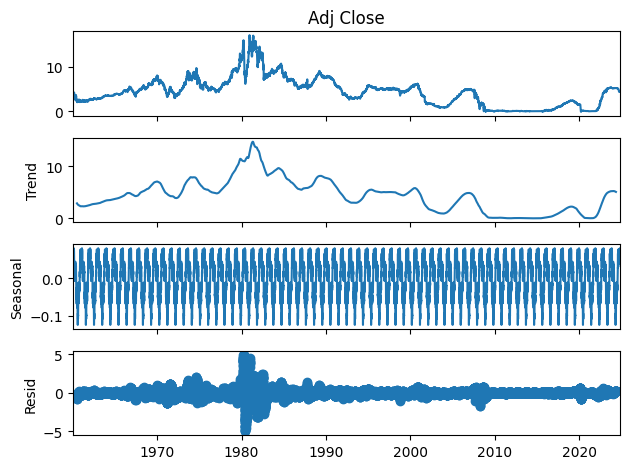

In [4]:
# Kiểm tra tính dừng và các thành phần

# Sử dụng kiểm định ADF và phân rã thành phần.
# ADF test
result = adfuller(adj_close)
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

# Seasonal decomposition
decomposition = seasonal_decompose(adj_close, model="additive", period=252)  # Assuming 252 trading days
decomposition.plot()
plt.show()

ADF Statistic: -2.2762090891828537, p-value: 0.17975584349602575


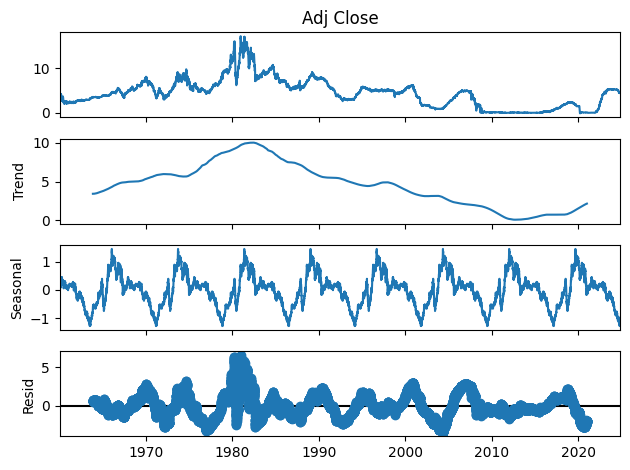

In [ ]:
# Kiểm tra tính dừng và các thành phần

# Sử dụng kiểm định ADF và phân rã thành phần.
# ADF test
result = adfuller(adj_close)
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

# Seasonal decomposition
decomposition = seasonal_decompose(adj_close, model="additive", period=2000)  # Assuming 252 trading days
decomposition.plot()
plt.show()

ADF Statistic: -2.2762090891828537, p-value: 0.17975584349602575


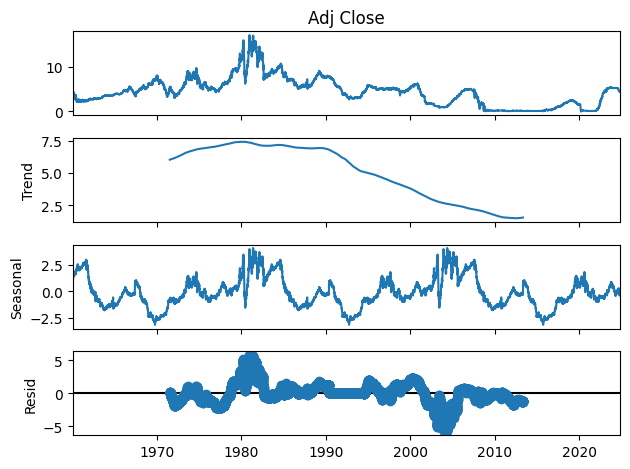

In [55]:
# Kiểm tra tính dừng và các thành phần

# Sử dụng kiểm định ADF và phân rã thành phần.
# ADF test
result = adfuller(adj_close)
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

# Seasonal decomposition
decomposition = seasonal_decompose(adj_close, model="additive", period=6000)  # Assuming 252 trading days
decomposition.plot()
plt.show()

<Figure size 1200x600 with 0 Axes>

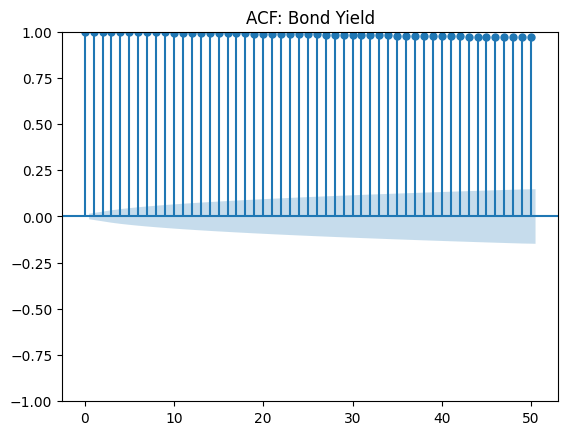

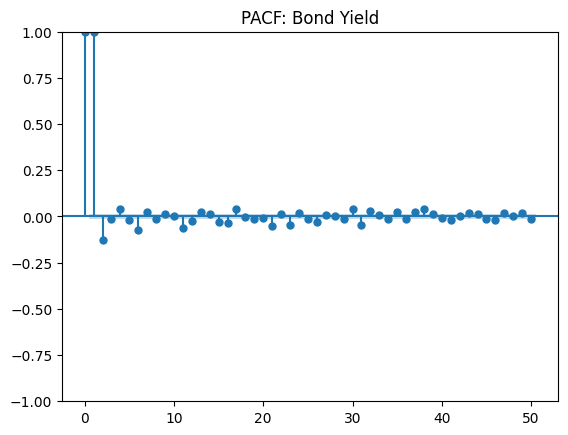

In [5]:
# Tính toán và trực quan hóa ACF/PACF

# Phân tích độ tự tương quan.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(adj_close, lags=50, title="ACF: Bond Yield")
plot_pacf(adj_close, lags=50, title="PACF: Bond Yield")
plt.show()


Naïve Model RMSE: 0.0855


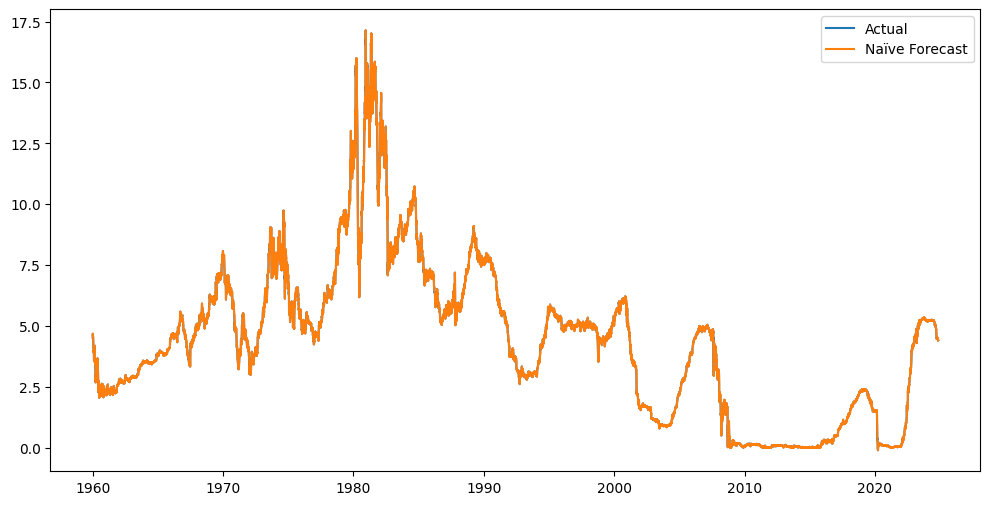

In [6]:
# Nhóm 1: Naïve & Holt-Winters
# Naïve Model

# Naïve Forecast
naive_forecast = adj_close.shift(1)
mse_naive = mean_squared_error(adj_close[1:], naive_forecast[1:])
print(f"Naïve Model RMSE: {np.sqrt(mse_naive):.4f}")

plt.figure(figsize=(12, 6))
plt.plot(adj_close, label="Actual")
plt.plot(naive_forecast, label="Naïve Forecast")
plt.legend()
plt.show()

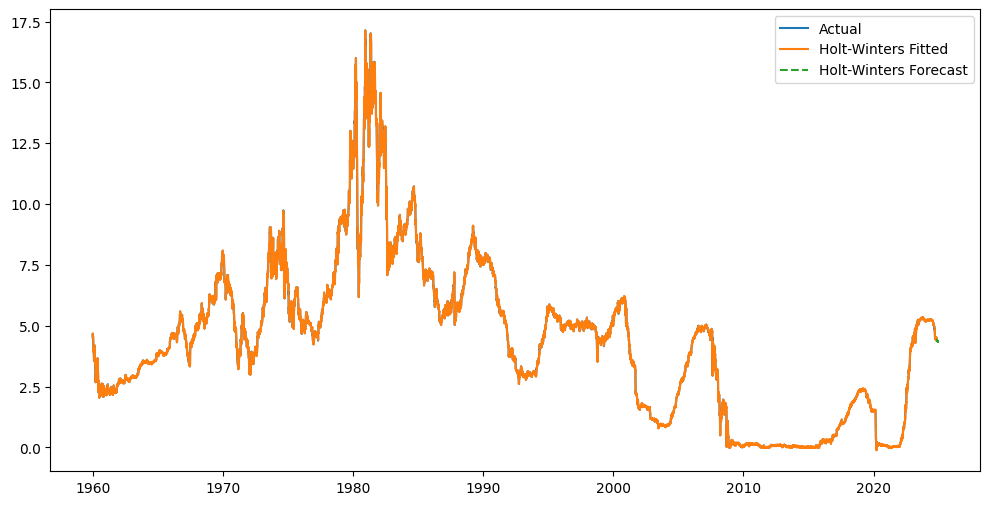

In [7]:
# Holt-Winters

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters Model
hw_model = ExponentialSmoothing(adj_close, seasonal="add", seasonal_periods=252)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(adj_close, label="Actual")
plt.plot(hw_fit.fittedvalues, label="Holt-Winters Fitted")
plt.plot(hw_forecast, label="Holt-Winters Forecast", linestyle="--")
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                16920
Model:                 ARIMA(1, 1, 1)   Log Likelihood               17735.813
Date:                Mon, 18 Nov 2024   AIC                         -35465.625
Time:                        03:37:01   BIC                         -35442.417
Sample:                    01-04-1960   HQIC                        -35457.970
                         - 11-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1832      0.019      9.636      0.000       0.146       0.220
ma.L1         -0.0573      0.019     -2.967      0.003      -0.095      -0.019
sigma2         0.0072   1.79e-05    401.016      0.0

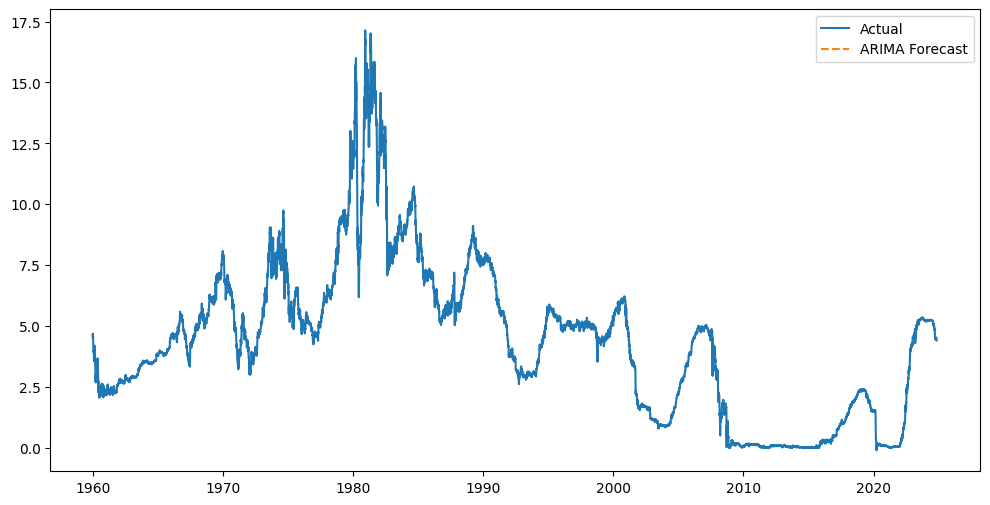

In [8]:
# Nhóm 2: ARIMA

# Tìm tham số ARIMA bằng ACF/PACF và thử nghiệm.
# ARIMA Model
model = ARIMA(adj_close, order=(1, 1, 1))
arima_fit = model.fit()
print(arima_fit.summary())

# Forecast
forecast = arima_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(adj_close, label="Actual")
plt.plot(forecast, label="ARIMA Forecast", linestyle="--")
plt.legend()
plt.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 141484.47189530722
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1603758.495685565
Iteration:      3,   Func. Count:     21,   Neg. LLF: 50091.9561426086
Iteration:      4,   Func. Count:     26,   Neg. LLF: 77565.69994863184
Iteration:      5,   Func. Count:     35,   Neg. LLF: 97689.83555922055
Iteration:      6,   Func. Count:     42,   Neg. LLF: 79560.89565553452
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4502622741.546713
Iteration:      8,   Func. Count:     55,   Neg. LLF: 37460.30861761154
Iteration:      9,   Func. Count:     60,   Neg. LLF: 41416.484825843356
Iteration:     10,   Func. Count:     68,   Neg. LLF: 40467.77387371601
Iteration:     11,   Func. Count:     74,   Neg. LLF: 35393.101613041574
Iteration:     12,   Func. Count:     79,   Neg. LLF: 35847.07964647913
Iteration:     13,   Func. Count:     85,   Neg. LLF: 35372.596878947785
Iteration:     14,   Func. Count:     91,   Neg. LLF: 35215.7

/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


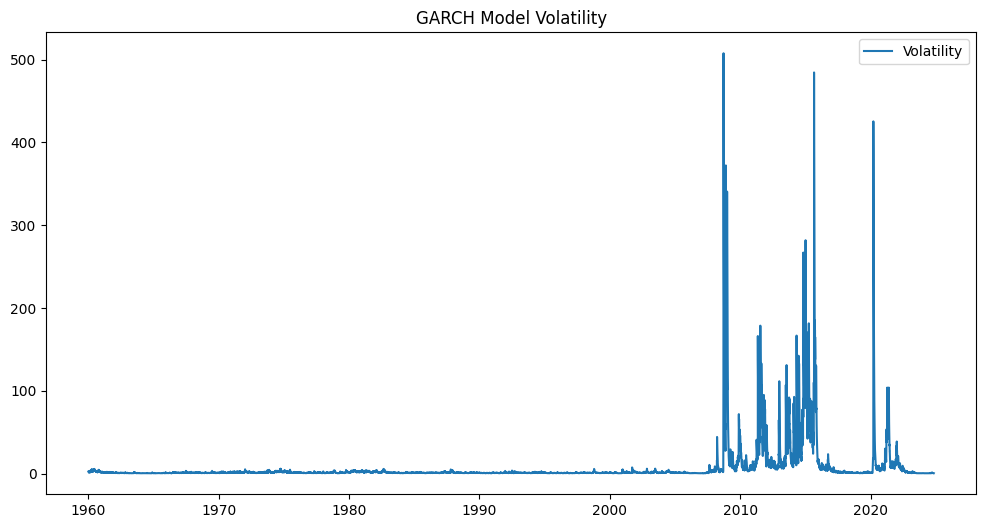

In [9]:
# Nhóm 3: GARCH

# Dùng mô hình GARCH để dự đoán volatility.
# Fit GARCH model
returns = adj_close.pct_change().dropna() * 100
garch_model = arch_model(returns, vol="Garch", p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())

# Plot volatility
volatility = garch_fit.conditional_volatility
plt.figure(figsize=(12, 6))
plt.plot(volatility, label="Volatility")
plt.title("GARCH Model Volatility")
plt.legend()
plt.show()


In [14]:
# Nhóm 4: LSTM

# Sử dụng mô hình LSTM để dự báo.

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(adj_close.values.reshape(-1, 1))

# Prepare training/testing sets
look_back = 30
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i + look_back, 0])
    y.append(scaled_data[i + look_back, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


2024-11-18 03:41:01.521810: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 03:41:01.536049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731876061.546835 1166248 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731876061.549615 1166248 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 03:41:01.560952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Epoch 1/10


2024-11-18 03:41:03.310066: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0080
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.3821e-04
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.7773e-04
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.7831e-04
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.4107e-04
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.2421e-04
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.1553e-04
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.0779e-04
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 8.1245e-05
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 7.8761e-05
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


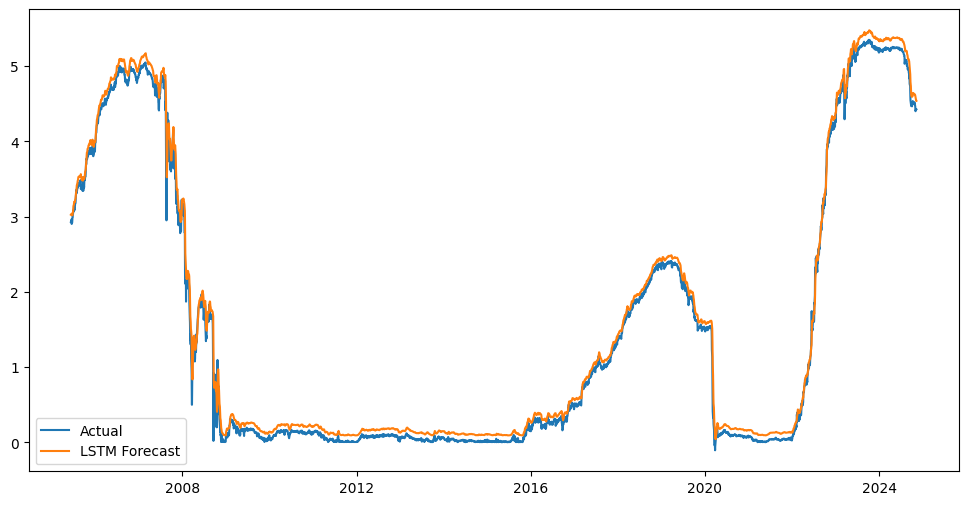

In [15]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(adj_close.index[-len(y_test):], adj_close[-len(y_test):], label="Actual")
plt.plot(adj_close.index[-len(y_test):], lstm_predictions, label="LSTM Forecast")
plt.legend()
plt.show()


In [16]:
# So sánh các mô hình

# Sử dụng RMSE, MAE để so sánh.
# RMSE and MAE
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

naive_rmse, naive_mae = evaluate(adj_close[1:], naive_forecast[1:])
arima_rmse, arima_mae = evaluate(adj_close[-len(forecast):], forecast)
lstm_rmse, lstm_mae = evaluate(adj_close[-len(y_test):], lstm_predictions)

print(f"Naïve Model - RMSE: {naive_rmse:.4f}, MAE: {naive_mae:.4f}")
print(f"ARIMA Model - RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}")
print(f"LSTM Model - RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}")


Naïve Model - RMSE: 0.0855, MAE: 0.0406
ARIMA Model - RMSE: 0.0720, MAE: 0.0625
LSTM Model - RMSE: 0.1161, MAE: 0.0977


In [ ]:
import joblib

# Save ARIMA model
joblib.dump(arima_fit, 'models/arima_model.pkl')

# Save GARCH model
joblib.dump(garch_fit, 'models/garch_model.pkl')

# Save LSTM model
model.save('models/lstm_model.h5')


In [ ]:
# Load ARIMA model
arima_loaded = joblib.load('models/arima_model.pkl')

# Load GARCH model
garch_loaded = joblib.load('models/garch_model.pkl')

# Load LSTM model
from keras.models import load_model
lstm_loaded = load_model('models/lstm_model.h5')

2024-11-11    4.423308
2024-11-12    4.423365
2024-11-13    4.423375
2024-11-14    4.423377
2024-11-15    4.423377
2024-11-18    4.423377
2024-11-19    4.423377
2024-11-20    4.423377
2024-11-21    4.423377
2024-11-22    4.423377
2024-11-25    4.423377
2024-11-26    4.423377
2024-11-27    4.423377
2024-11-28    4.423377
2024-11-29    4.423377
2024-12-02    4.423377
2024-12-03    4.423377
2024-12-04    4.423377
2024-12-05    4.423377
2024-12-06    4.423377
2024-12-09    4.423377
2024-12-10    4.423377
2024-12-11    4.423377
2024-12-12    4.423377
2024-12-13    4.423377
2024-12-16    4.423377
2024-12-17    4.423377
2024-12-18    4.423377
2024-12-19    4.423377
2024-12-20    4.423377
Freq: B, Name: predicted_mean, dtype: float64


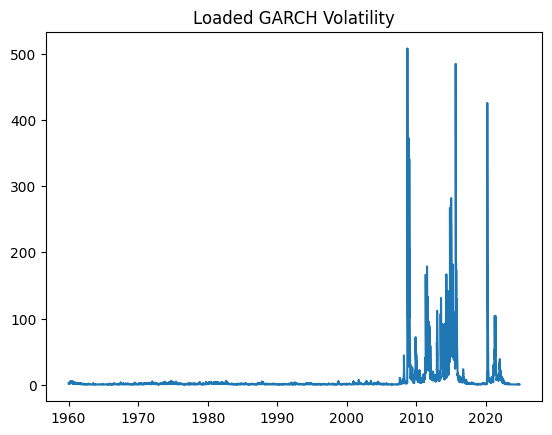

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


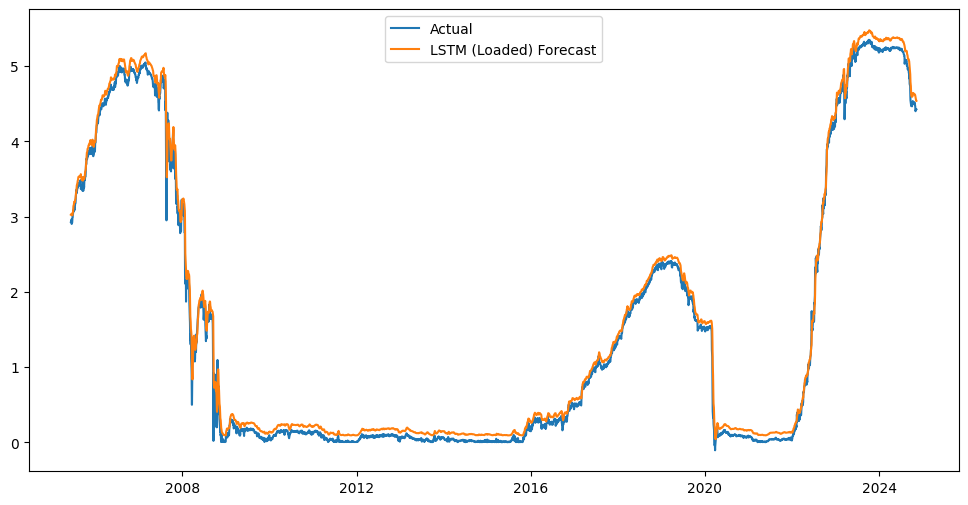

In [18]:
# Forecast using loaded ARIMA model
arima_forecast_loaded = arima_loaded.forecast(steps=30)
print(arima_forecast_loaded)

# Conditional volatility using loaded GARCH model
volatility_loaded = garch_loaded.conditional_volatility
plt.plot(volatility_loaded)
plt.title("Loaded GARCH Volatility")
plt.show()

# Predict using loaded LSTM model
lstm_predictions_loaded = lstm_loaded.predict(X_test)
lstm_predictions_loaded = scaler.inverse_transform(lstm_predictions_loaded)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(adj_close.index[-len(y_test):], adj_close[-len(y_test):], label="Actual")
plt.plot(adj_close.index[-len(y_test):], lstm_predictions_loaded, label="LSTM (Loaded) Forecast")
plt.legend()
plt.show()


---

Compare when use train:test

In [19]:
# Split data
train_size = int(len(adj_close) * 0.8)  # 80% train, 20% test
train, test = adj_close[:train_size], adj_close[train_size:]

In [20]:
# Naïve forecast on test data
naive_forecast = [train[-1]] * len(test)

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA on train data
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast on test data
arima_forecast = arima_fit.forecast(steps=len(test))

In [22]:
from arch import arch_model

# Fit GARCH on train data
garch_model = arch_model(train, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Forecast volatility for test data
garch_forecast = garch_fit.forecast(horizon=len(test))
vol_forecast = garch_forecast.variance[-1:]

In [23]:
# Split data (80% train, 20% test)
train_size = int(len(adj_close) * 0.8)  # 80% train, 20% test
train, test = adj_close[:train_size], adj_close[train_size:]

# Rescale data (Normalization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Look-back window
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0056 - val_loss: 7.5026e-05
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 1.9903e-04 - val_loss: 1.4468e-05
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 1.5905e-04 - val_loss: 1.7793e-05
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.2073e-04 - val_loss: 3.4209e-05
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 1.1196e-04 - val_loss: 9.9752e-06
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 9.9051e-05 - val_loss: 1.6533e-05
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 9.5579e-05 - val_loss: 1.5103e-05
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 6.9076e-05 - val_loss: 1.3742e-05
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 6.3179e-05 - val_loss: 6.5139e-06
Epoch 10/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 6.3369e-05 - val_loss: 6.5542e-05
Epoch 11/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/

In [24]:
import joblib

# Save ARIMA model
joblib.dump(arima_fit, 'models1/arima_model.pkl')

# Save GARCH model
joblib.dump(garch_fit, 'models1/garch_model.pkl')

# Save LSTM model
model.save('models1/lstm_model.h5')


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate Naïve
mae_naive = mean_absolute_error(test, naive_forecast)
rmse_naive = np.sqrt(mean_squared_error(test, naive_forecast))

# Evaluate ARIMA
mae_arima = mean_absolute_error(test, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))

# # Evaluate LSTM (from previous results)
# lstm_predictions = model.predict(test[1])

# # Nếu lstm_predictions có shape (n, 1), ta cần làm phẳng nó thành 1 chiều để so sánh
# lstm_predictions = lstm_predictions.flatten()

# # Đảo ngược nếu dự báo LSTM đã chuẩn hóa
# lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions.reshape(-1, 1)).flatten()

# # Calculate MAE and RMSE for LSTM
# mae_lstm = mean_absolute_error(test, lstm_predictions_rescaled)
# rmse_lstm = np.sqrt(mean_squared_error(test, lstm_predictions_rescaled))

# Print results
print(f"Naïve: MAE={mae_naive}, RMSE={rmse_naive}")
print(f"ARIMA: MAE={mae_arima}, RMSE={rmse_arima}")
# print(f"LSTM: MAE={mae_lstm}, RMSE={rmse_lstm}")


Naïve: MAE=1.315896866317309, RMSE=2.2031261672927034
ARIMA: MAE=1.3158970390257392, RMSE=2.2031262738335826


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Giả sử test có dạng DataFrame với 2 cột: 'Date' và 'Adj Close'
# Lấy cột giá trị từ 'Adj Close'
test_values = test.values

# Giả sử lstm_predictions_rescaled đã được chuẩn hóa và có chiều dài phù hợp với test_values
# Kiểm tra kích thước của test và lstm_predictions_rescaled
print(f"Size of test: {len(test_values)}")
print(f"Size of lstm_predictions_rescaled: {len(lstm_predictions_rescaled)}")

# Đảm bảo kích thước của test và lstm_predictions_rescaled khớp nhau
min_len = min(len(test_values), len(lstm_predictions_rescaled))
test_values = test_values[:min_len]
lstm_predictions_rescaled = lstm_predictions_rescaled[:min_len]

# Tính toán MAE và RMSE
mae_lstm = mean_absolute_error(test_values, lstm_predictions_rescaled)
rmse_lstm = np.sqrt(mean_squared_error(test_values, lstm_predictions_rescaled))

print(f"LSTM: MAE={mae_lstm}, RMSE={rmse_lstm}")


Size of test: 3384
Size of lstm_predictions_rescaled: 3324
LSTM: MAE=0.20307799882591968, RMSE=0.3816047080863431


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to evaluate and print results
def evaluate_model(true_values, predicted_values, model_name):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    print(f"{model_name}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")
    return mae, rmse

# Evaluate Naïve Method
naive_mae, naive_rmse = evaluate_model(test, naive_forecast, "Naïve")

# Evaluate ARIMA
arima_mae, arima_rmse = evaluate_model(test, arima_forecast, "ARIMA")

# Evaluate LSTM
# Reverse scaling for LSTM predictions if not already done
lstm_predictions_scaled = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))
lstm_mae, lstm_rmse = evaluate_model(test.values, lstm_predictions_scaled.flatten(), "LSTM")

# Collect results for easy comparison
results = {
    "Model": ["Naïve", "ARIMA", "LSTM"],
    "MAE": [naive_mae, arima_mae, lstm_mae],
    "RMSE": [naive_rmse, arima_rmse, lstm_rmse],
}

# Display results as a table
import pandas as pd

results_df = pd.DataFrame(results)
print("\nComparison of Model Performance:")
print(results_df)


Naïve: MAE = 1.3159, RMSE = 2.2031
ARIMA: MAE = 1.3159, RMSE = 2.2031


ValueError: Found input variables with inconsistent numbers of samples: [3384, 3324]

NameError: name 'test_predictions' is not defined

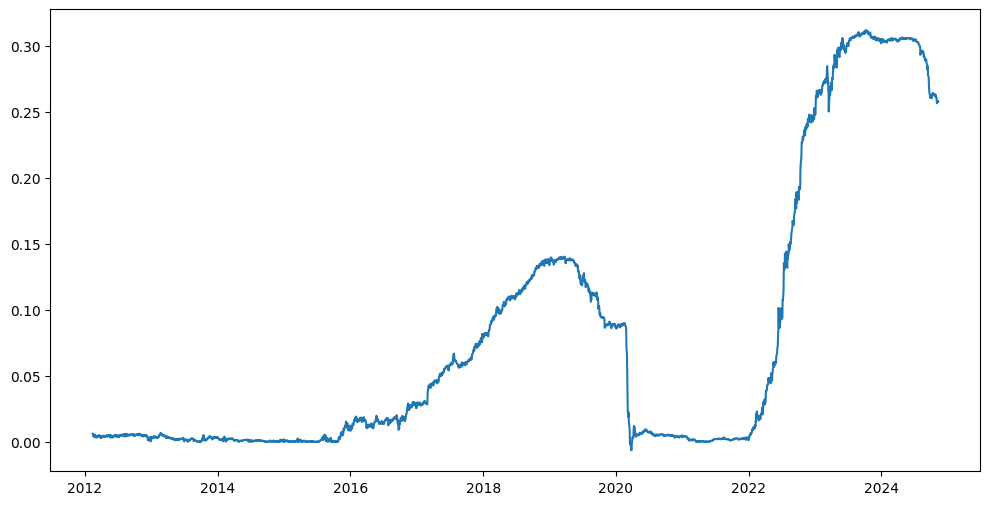

In [25]:
import matplotlib.pyplot as plt

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(adj_close.index[-len(y_test):], y_test, label='Actual')
plt.plot(adj_close.index[-len(y_test):], test_predictions, label='LSTM Prediction', color='red')
plt.title("LSTM Prediction vs Actual")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plt

# Giả sử test_data là DataFrame chứa dữ liệu của bạn, với cột 'Adj Close' là giá trị
# Load data
data = pd.read_csv("data/data.csv", parse_dates=["Date"], index_col="Date")
data = data.asfreq('B')  # Business day frequency
adj_close = data['Adj Close']

# Check for missing values
adj_close = adj_close.fillna(method='ffill')

# Split dữ liệu 60:20:20
train_size = int(len(adj_close) * 0.6)
val_size = int(len(adj_close) * 0.2)
train, val, test = adj_close[:train_size], adj_close[train_size:train_size+val_size], adj_close[train_size+val_size:]

# Lưu cột giá trị cho so sánh
# train_values = train['Adj Close'].values
# val_values = val['Adj Close'].values
# test_values = test['Adj Close'].values
train_values = train.values
val_values = val.values
test_values = test.values

# Reshape cho mô hình LSTM
def create_lstm_data(values, n_in=1):
    X, y = [], []
    for i in range(len(values)):
        end_ix = i + n_in
        if end_ix > len(values)-1:
            break
        seq_x, seq_y = values[i:end_ix], values[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_in = 60
X_train, y_train = create_lstm_data(train_values, n_in)
X_val, y_val = create_lstm_data(val_values, n_in)
X_test, y_test = create_lstm_data(test_values, n_in)

# Chuẩn hóa dữ liệu cho LSTM
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Mô hình Naïve (Persistence Model)
naive_forecast = train_values[-1]  # Sử dụng giá trị cuối cùng của training set để dự báo

# Mô hình Holt-Winters (Exponential Smoothing)
holt_winters_model = ExponentialSmoothing(train_values, trend='add', seasonal='add', seasonal_periods=12).fit()
holt_winters_forecast = holt_winters_model.forecast(len(test_values))

# Mô hình ARIMA
arima_model = ARIMA(train_values, order=(5,1,0))  # ARIMA(p,d,q)
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(len(test_values))

# Mô hình SARIMA
sarima_model = SARIMAX(train_values, order=(5,1,0), seasonal_order=(1,1,0,12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(len(test_values))

# Mô hình LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_in, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Dừng sớm khi validation không cải thiện sau 5 epoch
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Huấn luyện LSTM
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.32065D-01    |proj g|=  1.79876D+00

At iterate    5    f= -6.53407D-01    |proj g|=  5.40744D-02

At iterate   10    f= -6.54291D-01    |proj g|=  1.75938D-03

At iterate   15    f= -6.54293D-01    |proj g|=  1.19466D-03

At iterate   20    f= -6.54293D-01    |proj g|=  2.12661D-03

At iterate   25    f= -6.54293D-01    |proj g|=  1.14368D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     30      1     0     0   

ValueError: non-broadcastable output operand with shape (3324,1) doesn't match the broadcast shape (3324,60)

In [42]:
lstm_predictions.shape

(3324, 1)

In [51]:
lstm_predictions.shape

(3324, 1)

Naïve: MAE=3.251804158286809, RMSE=3.5331088352064954
Holt-Winters: MAE=3.2396888381146907, RMSE=3.516586749949218
ARIMA: MAE=3.240649293970796, RMSE=3.519610757206792
SARIMA: MAE=12.307136120937617, RMSE=13.005723594172022
AIC: -17348.21215104352
BIC: -17304.860186032813


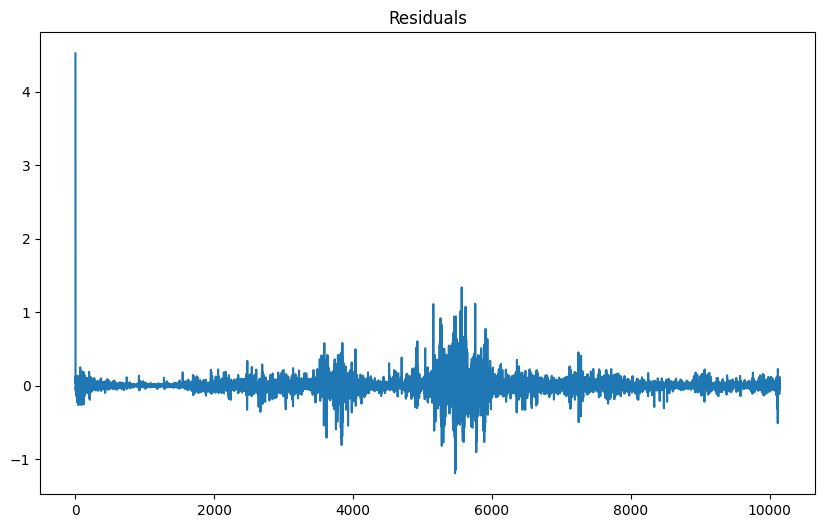

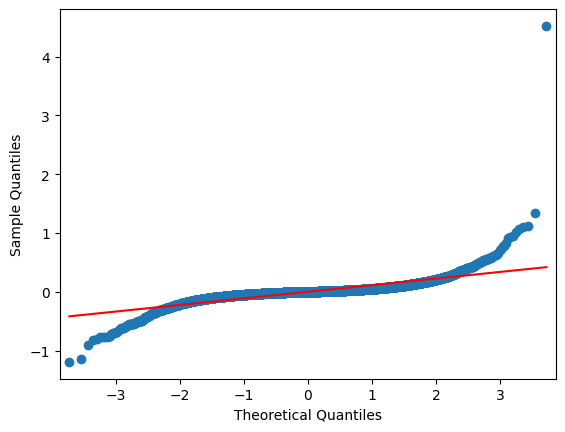

AIC: -13270.765720118286
BIC: -13220.196707547619


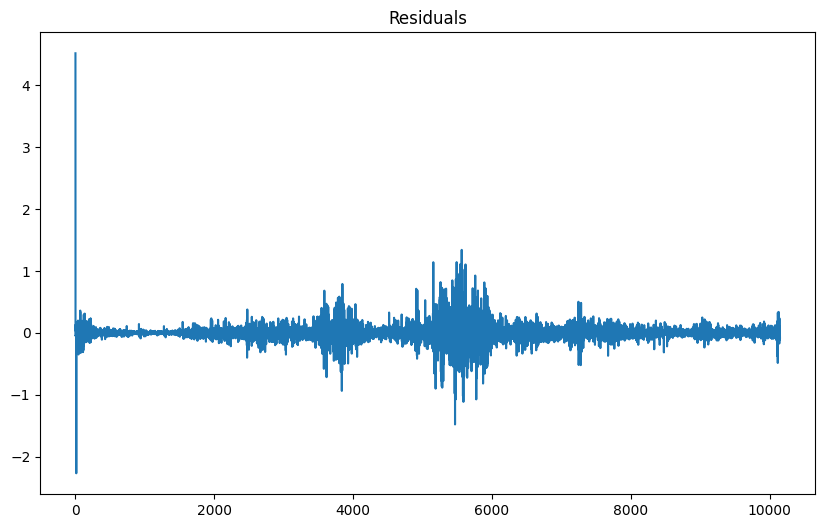

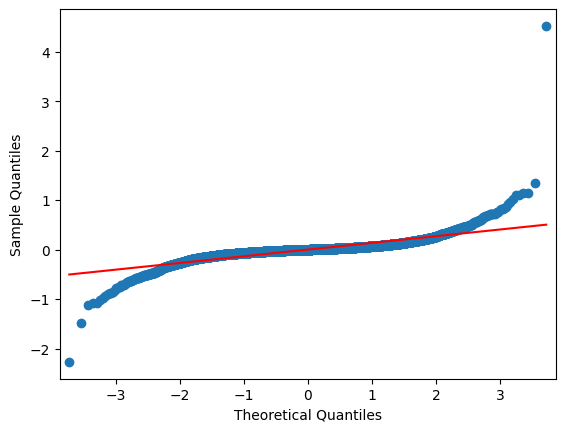

In [ ]:
# # Dự báo LSTM
# # Tạo lại dữ liệu với create_lstm_data
# n_in = 60  # Số bước thời gian trong mỗi chuỗi

# # Xây dựng dữ liệu cho LSTM
# # X, y = create_lstm_data(train_values, n_in=n_in)  # Xây dựng cho tập train

# # Định nghĩa lại X_test
# X_test, y_test = create_lstm_data(test_values, n_in=n_in)  # Tạo dữ liệu cho tập test

# lstm_predictions = model.predict(X_test)

# # Reshape dự đoán LSTM để có đúng dạng (n_samples, n_features)
# lstm_predictions_reshaped = lstm_predictions.reshape(-1, 1)

# # Giải mã các giá trị dự đoán về dạng ban đầu
# # lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions_reshaped).flatten()

# # # Inverse Transform LSTM predictions (no need to reshape if it's already (n_samples, 1))
# # lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions).flatten()

# Đánh giá mô hình
def evaluate_model(test, forecast):
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    return mae, rmse

# Đánh giá các mô hình
mae_naive, rmse_naive = evaluate_model(test_values, np.full_like(test_values, naive_forecast))
mae_hw, rmse_hw = evaluate_model(test_values, holt_winters_forecast)
mae_arima, rmse_arima = evaluate_model(test_values, arima_forecast)
mae_sarima, rmse_sarima = evaluate_model(test_values, sarima_forecast)
# mae_lstm, rmse_lstm = evaluate_model(test_values, lstm_predictions_rescaled)

# In kết quả đánh giá
print(f"Naïve: MAE={mae_naive}, RMSE={rmse_naive}")
print(f"Holt-Winters: MAE={mae_hw}, RMSE={rmse_hw}")
print(f"ARIMA: MAE={mae_arima}, RMSE={rmse_arima}")
print(f"SARIMA: MAE={mae_sarima}, RMSE={rmse_sarima}")
# print(f"LSTM: MAE={mae_lstm}, RMSE={rmse_lstm}")



# Kiểm định phần dư cho ARIMA, SARIMA
def check_residuals(model_fit):
    residuals = model_fit.resid
    print(f"AIC: {model_fit.aic}")
    print(f"BIC: {model_fit.bic}")
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title('Residuals')
    plt.show()
    sm.qqplot(residuals, line='s')
    plt.show()

# Kiểm định ARIMA và SARIMA
check_residuals(arima_fit)
check_residuals(sarima_fit)

# # Lưu mô hình tốt nhất (ví dụ: LSTM)
# with open('lstm_model.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [46]:
test_values.shape

(3384,)